In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr
%matplotlib inline

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Data Collection: 

In [3]:
data = pd.read_csv(r"C:\Users\lxy_l\Downloads\ifood_df.csv")

In [4]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [5]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# Data Exploration and Cleaning: 
## Exploring the dataset, understand its structure, and handle any missing or inconsistent data.

In [6]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [7]:
data.isnull().sum()*100/data.shape[0]

Income                  0.0
Kidhome                 0.0
Teenhome                0.0
Recency                 0.0
MntWines                0.0
MntFruits               0.0
MntMeatProducts         0.0
MntFishProducts         0.0
MntSweetProducts        0.0
MntGoldProds            0.0
NumDealsPurchases       0.0
NumWebPurchases         0.0
NumCatalogPurchases     0.0
NumStorePurchases       0.0
NumWebVisitsMonth       0.0
AcceptedCmp3            0.0
AcceptedCmp4            0.0
AcceptedCmp5            0.0
AcceptedCmp1            0.0
AcceptedCmp2            0.0
Complain                0.0
Z_CostContact           0.0
Z_Revenue               0.0
Response                0.0
Age                     0.0
Customer_Days           0.0
marital_Divorced        0.0
marital_Married         0.0
marital_Single          0.0
marital_Together        0.0
marital_Widow           0.0
education_2n Cycle      0.0
education_Basic         0.0
education_Graduation    0.0
education_Master        0.0
education_PhD       

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Descriptive Statistics: 
## Calculate key metrics such as average purchase value, frequency of purchases.

In [9]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [10]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


Text(0.5, 1.0, 'Density of Income')

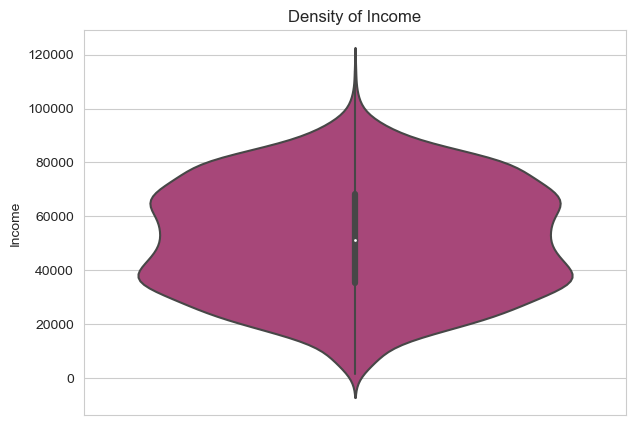

In [91]:
f, ax = plt.subplots(figsize=(7, 5))
sns.violinplot(y='Income', data = pd.read_csv(r"C:\Users\lxy_l\Downloads\ifood_df.csv"), palette='magma')
plt.title('Density of Income')

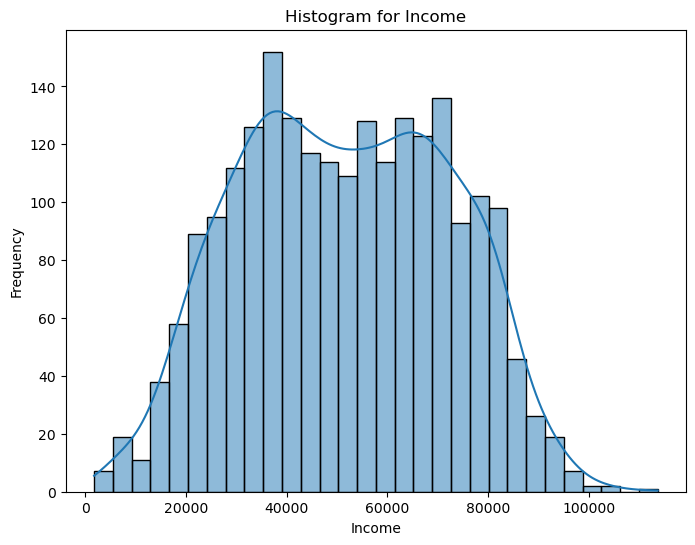

In [12]:
 plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Density of Age'}, ylabel='Age'>

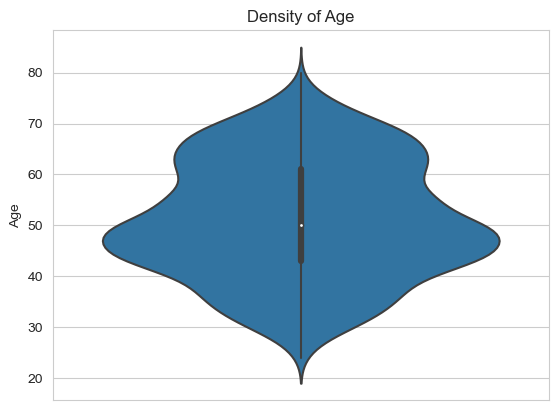

In [99]:
data = pd.read_csv(r"C:\Users\lxy_l\Downloads\ifood_df.csv")
plt.title('Density of Age')
sns.violinplot(y=data['Age'])

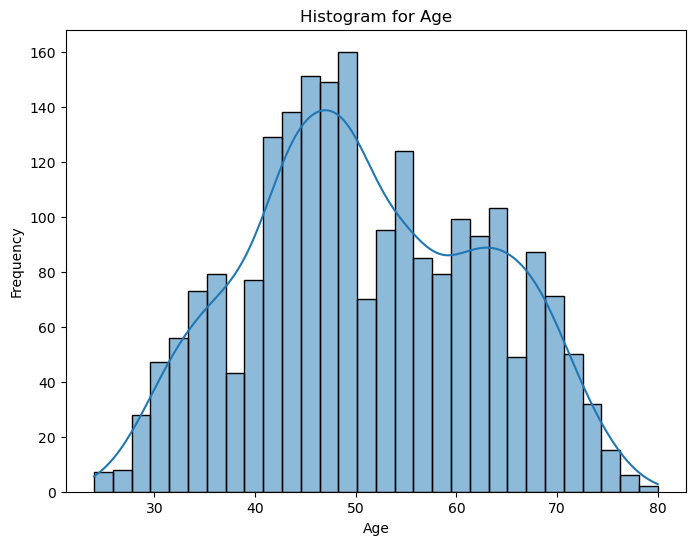

In [14]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,1.450087e-17,2.900174e-17,4.833624e-18,5.880909e-17,-3.383537e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-3.140935e-01,-1.584443e-01,-1.009570e+00,-4.446556e-01,-5.246939e-01
25%,-3.140935e-01,-1.584443e-01,-1.009570e+00,-4.446556e-01,-5.246939e-01
50%,-3.140935e-01,-1.584443e-01,9.905211e-01,-4.446556e-01,-5.246939e-01
75%,-3.140935e-01,-1.584443e-01,9.905211e-01,-4.446556e-01,-5.246939e-01
max,3.183766e+00,6.311365e+00,9.905211e-01,2.248931e+00,1.905873e+00


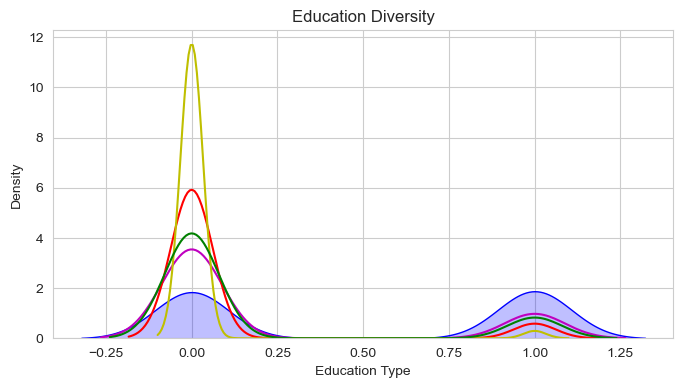

In [100]:
f, ax = plt.subplots(figsize=(8, 4))

sns.kdeplot 
sns.kdeplot(data['education_PhD'], fill=False, color='m')
sns.kdeplot(data['education_2n Cycle'], fill=False, color='r')
sns.kdeplot(data['education_Basic'], fill=False, color='y')
sns.kdeplot(data['education_Graduation'], fill=True, color='b')
sns.kdeplot(data['education_Master'], fill=False, color='g')

plt.title('Education Diversity')
plt.xlabel('Education Type')
plt.show()

In [18]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

In [19]:
def get_relationship(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


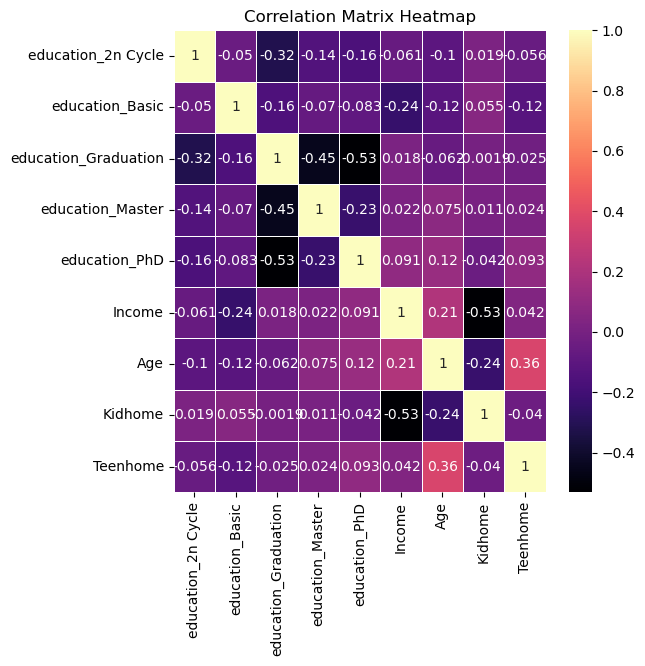

In [20]:
corr_matrix = data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

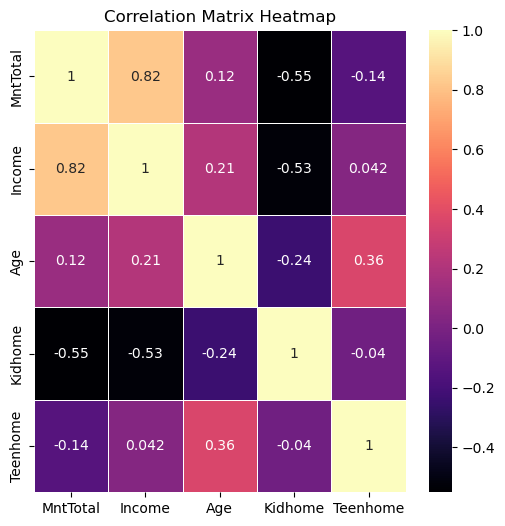

In [21]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [25]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = 'MntTotal'
frame['cluster'].value_counts()

MntTotal    2205
Name: cluster, dtype: int64

Text(0.5, 1.0, 'MntTotal Map')

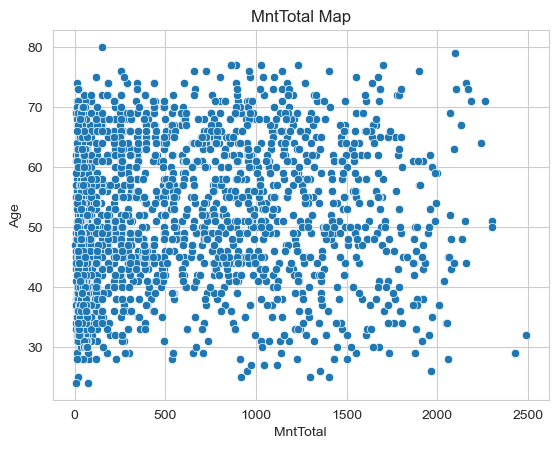

In [26]:
sns.set_style("whitegrid")
sns.scatterplot(x='MntTotal', y='Age', data=data)
plt.title("MntTotal Map")

<Axes: xlabel='Age', ylabel='Income'>

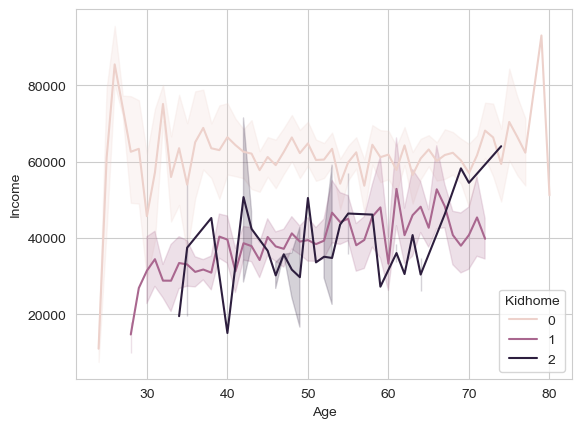

In [27]:
sns.lineplot(x='Age', y='Income', data=data, hue='Kidhome')

<Axes: xlabel='Age', ylabel='Income'>

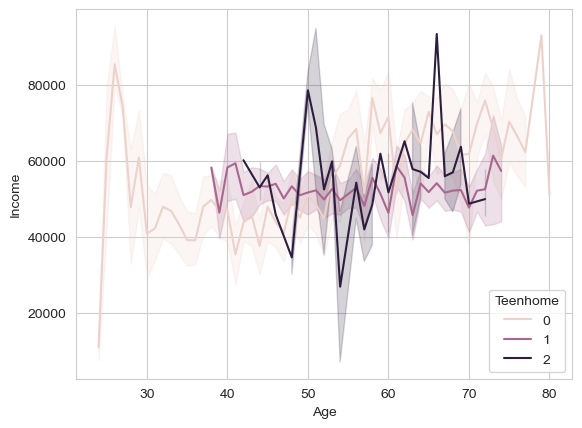

In [28]:
sns.lineplot(x='Age', y='Income', data=data, hue='Teenhome')

In [29]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

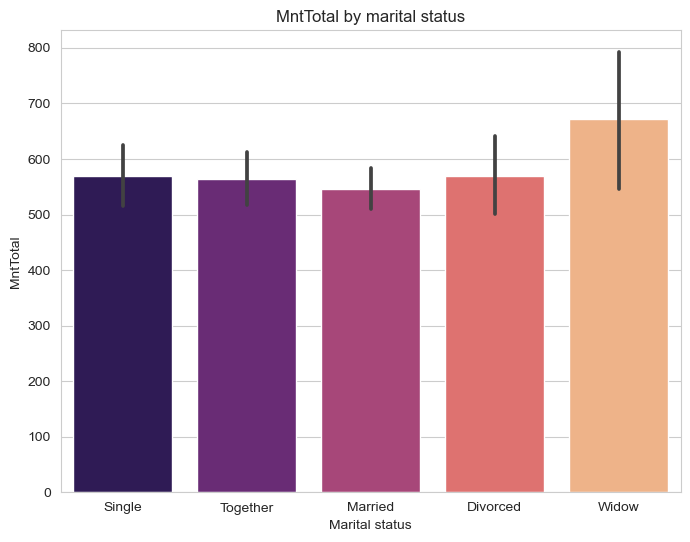

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='magma')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

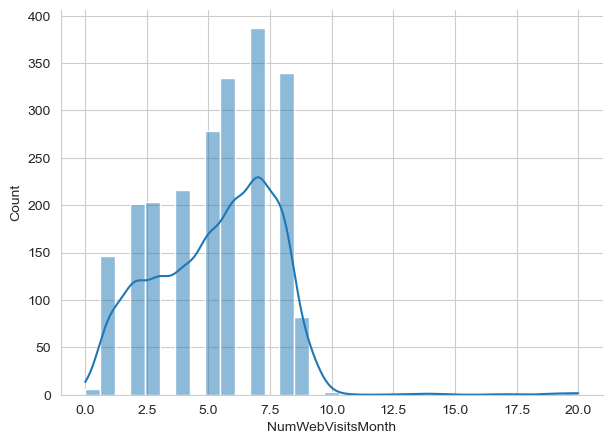

In [61]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(data['NumWebVisitsMonth'], kde=True)

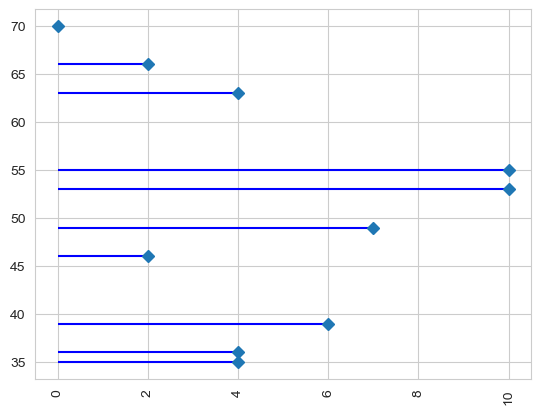

In [55]:
plt.hlines(y=data['Age'][:10][::-1], xmin=0, xmax=data['NumStorePurchases'][:10][::-1], color='blue')
plt.plot(data['NumStorePurchases'][:10][::-1], data['Age'][:10][::-1], 'D')
plt.xticks(rotation=90)
plt.show()

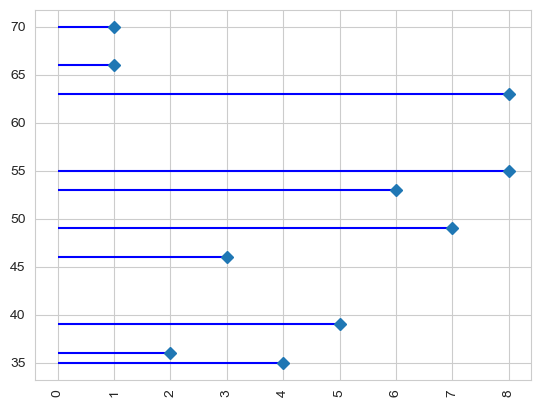

In [56]:
plt.hlines(y=data['Age'][:10][::-1], xmin=0, xmax=data['NumWebPurchases'][:10][::-1], color='blue')
plt.plot(data['NumWebPurchases'][:10][::-1], data['Age'][:10][::-1], 'D')
plt.xticks(rotation=90)
plt.show()

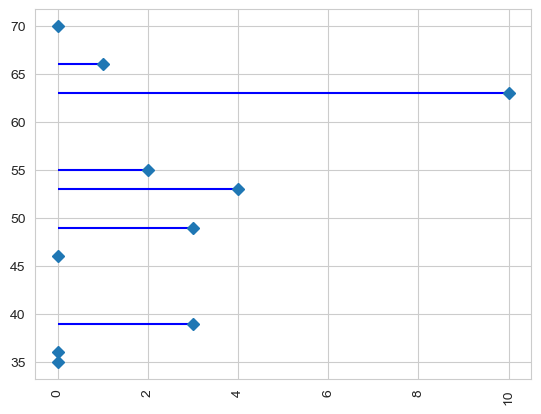

In [57]:
plt.hlines(y=data['Age'][:10][::-1], xmin=0, xmax=data['NumCatalogPurchases'][:10][::-1], color='blue')
plt.plot(data['NumCatalogPurchases'][:10][::-1], data['Age'][:10][::-1], 'D')
plt.xticks(rotation=90)
plt.show()

# Customer Segmentation: 
## Utilizing clustering algorithms K-means to segment customers based on behavior and purchase patterns.

In [35]:
model = KMeans(n_clusters=4, random_state = 7, n_init= 'auto')
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

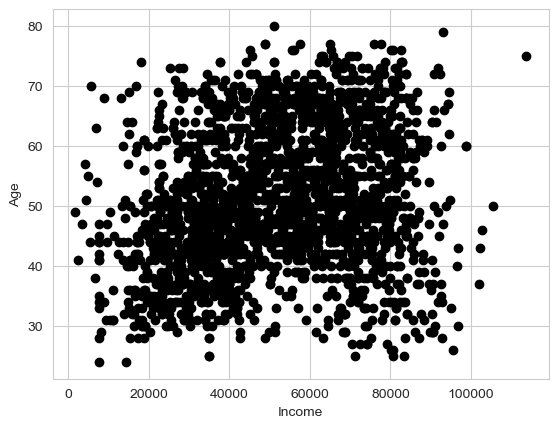

In [39]:
data = pd.read_csv(r"C:\Users\lxy_l\Downloads\ifood_df.csv")
data.head()


X = data[["Age","Income"]]
plt.scatter(X["Income"],X["Age"],c='black')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

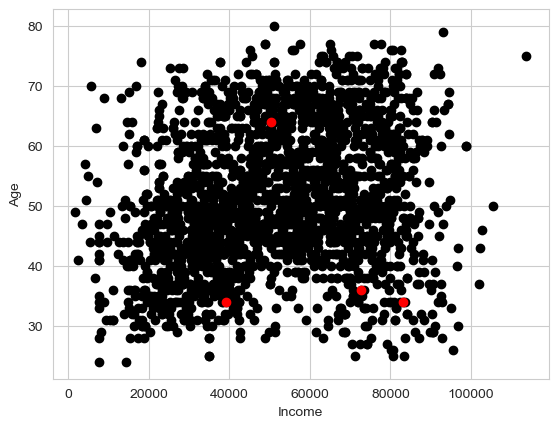

In [66]:
K=4

Centroids = (X.sample(n=K))
plt.scatter(X["Income"],X["Age"],c='black')
plt.scatter(Centroids["Income"],Centroids["Age"],c='red')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

Text(0, 0.5, 'MntTotal')

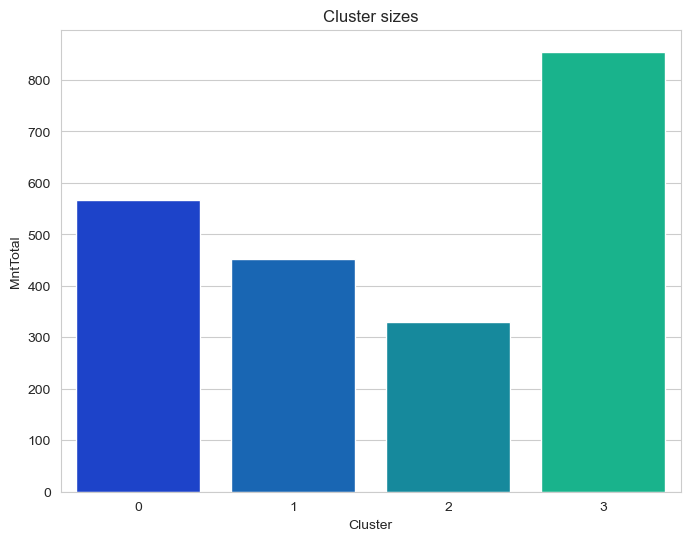

In [52]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'winter')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [45]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,567,26.0
1,1,453,21.0
2,2,330,15.0
3,3,855,39.0


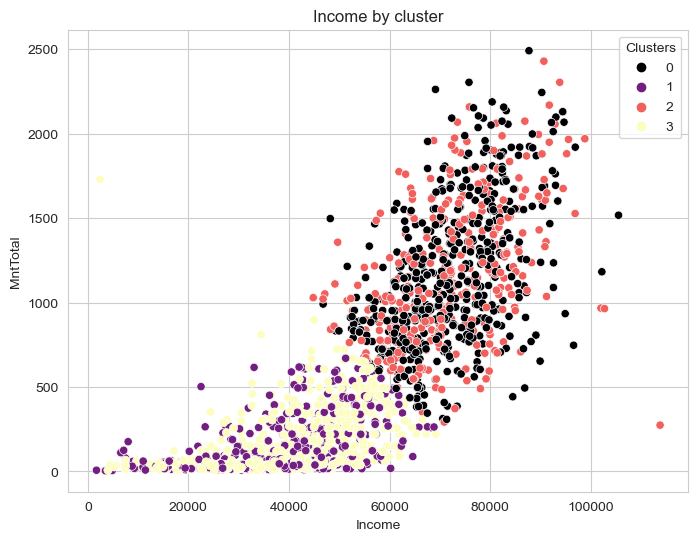

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='magma')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

In [67]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

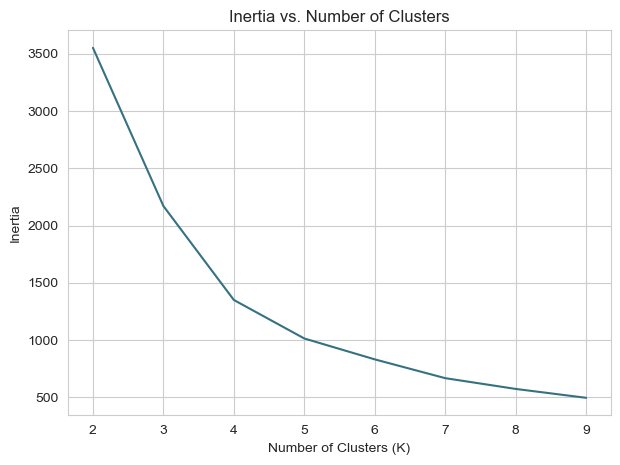

In [68]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [70]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

In [75]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1149.742504,1078.716049,624.382716,52.700176,342.162257,75.615520,54.881834,71.026455
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


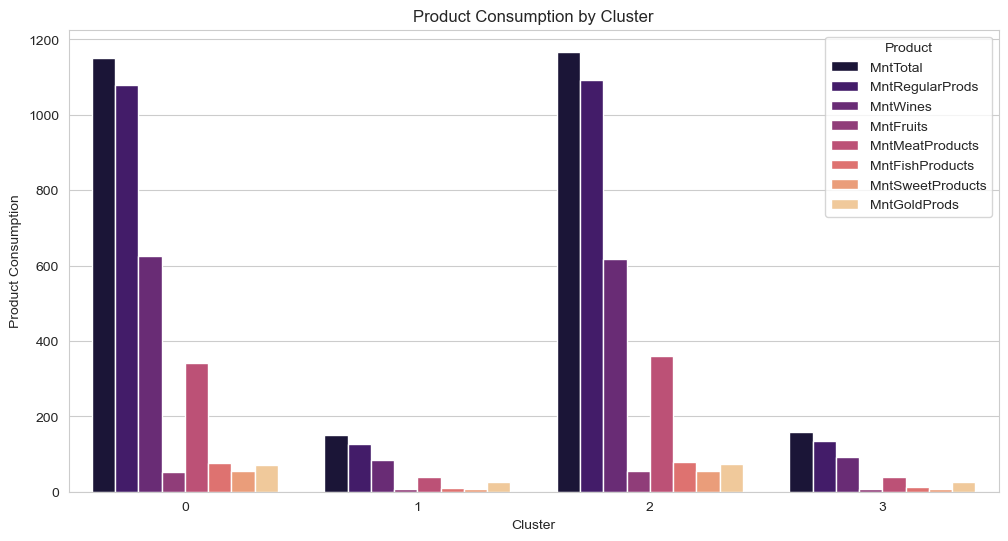

In [101]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="magma")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

# Insights and Recommendations: 

### Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences. Marketing Strategies for Each Cluster. Based on the identified clusters, customized marketing strategies can be developed to target each segment effectively. These clusters represent distinct  groups of customers with unique interests and product preferences.

#### Marketing Strategies for Each Cluster:


###### Cluster 0: High-Value Customers in Relationships

- Preliminary analysis indicates that customers in this cluster, often in relationships, have higher incomes and tend to purchase more wines and fruits.
- Tailored campaigns promoting high-quality wines could yield favorable results. Family-oriented promotional imagery may resonate well with this audience.

###### Cluster 1: Low-Value Single Customers

- Promotions offering discounts and coupons may be effective for this segment.
- Implementing a loyalty program could encourage increased purchase frequency.

###### Cluster 2: High-Value Single Customers

- Similar to Cluster 0, these customers exhibit a preference for wines and fruits, despite being single.
- Promotional content featuring social gatherings, parties, or solo adventures may resonate more with this group.

###### Cluster 3: Low-Value Customers in Relationships

- This cluster represents the largest percentage of our customer base (39%).
- Family-oriented offers and discounts could incentivize increased purchases among this segment.

##### Opportunities for Further Analysis:

- Investigate how children influence product consumption patterns.
- Explore the impact of education level on purchasing behavior.
- Analyze the buying behavior of frequent customers.
- Assess sales channel performance (e.g., store vs. website).
- Evaluate the effectiveness of marketing campaigns.
- Consider incorporating gender data into the dataset.
- Experiment with different clustering algorithms to optimize segmentation accuracy.

##### These insights pave the way for targeted marketing initiatives, driving enhanced customer engagement and satisfaction. Further analysis and experimentation will continue to refine our understanding of customer behavior and preferences.